In [1]:
import json
import pandas as pd
#from pandas import Int64Index
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from pyproj import Geod
from shapely.geometry import LineString
import numpy as np
import tempun
import seaborn as sns
#import geoplot as gplt

In [2]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (4.45, 3)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff", dpi=600)
    fig.savefig("../figures/" + fig_name + ".png", dpi=600)

# Loading data

In [3]:
### TO-DO: add  also Hanson cities and do the poleis accordingly

In [4]:
%%time
GIST = gpd.read_parquet("../data/large_data/GIST_lemmatized.parquet")

CPU times: user 1.79 s, sys: 416 ms, total: 2.2 s
Wall time: 1.93 s


In [5]:
%%time
GIST.head(5)

CPU times: user 537 µs, sys: 171 µs, total: 708 µs
Wall time: 701 µs


,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"{'data': ['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', '...",c. 510-500 a.,-511.0,-499.0,"{'data': ['range', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786251']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 1']},{'data': ['1672']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"{'data': ['ν', 'βοῦς', 'α', 'θύος', 'γνώστης',...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786252']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 2']},{'data': ['1707']},{'data': []},{'data': ['373']},NaN,NaN,None,None
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"{'data': ['Ἤρ', 'εἰσπλέω', 'Ἀθῆναι', 'τὶς', 'ἀ...",490-480 a.,-490.0,-480.0,{'data': ['range']},1701.0,1700.0,{'data': ['786253']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 3']},{'data': ['ii-1b']},{'data': []},{'data': ['373']},NaN,NaN,None,None
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"{'data': ['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', '...",485/4 a.,-485.0,-484.0,{'data': ['range']},1701.0,1700.0,{'data': ['786254']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG I³ 4(A)', 'IG I³ 4(B)']}",{'data': ['1692']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786255']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 5']},{'data': ['1284']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)


In [6]:
packed_columns = ['date_type', 'lemmata', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID',
                  'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID']

In [7]:
for col in packed_columns:
    try:
        GIST[col] = GIST[col].apply(lambda x: x["data"])
    except:
        print(col)

In [8]:
GIST.columns

Index(['PHI_ID', 'reference', 'metadata', 'lines', 'text_raw', 'text_iphi',
       'clean_text_conservative', 'clean_text_interpretive_word', 'lemmata',
       'raw_date', 'not_before', 'not_after', 'date_type', 'region_main_id',
       'region_sub_id', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID',
       'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID',
       'x_long', 'y_lat', 'TMgeo_name', 'geometry'],
      dtype='object')

In [9]:
GIST.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"[ν, βοῦς, α, θύος, γνώστης, δὲ, ν, ἄτεχνος, μή...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786252],[],[],[],[],[],[IG I³ 2],[1707],[],[373],NaN,NaN,None,None
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"[Ἤρ, εἰσπλέω, Ἀθῆναι, τὶς, ἀθλοθέτης, τριάκοντ...",490-480 a.,-490.0,-480.0,[range],1701.0,1700.0,[786253],[],[],[],[],[],[IG I³ 3],[ii-1b],[],[373],NaN,NaN,None,None
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)


In [10]:
len(GIST)

217863

In [11]:
((GIST["not_before"].notnull()) | (GIST["not_after"].notnull())).sum()

131677

## additional geographic data

In [12]:
# correct province boundaries
# province file from "https://edh.ub.uni-heidelberg.de/data/download/roman_province_boundaries.json"
provinces = gpd.read_file("../data/roman_province_boundaries.json")
provinces = provinces.to_crs(3035)
# based on advice from ChatGPT...
invalid_geometries = provinces[~provinces.geometry.is_valid]
# Make invalid geometries valid by buffering with a distance of 0
provinces.loc[~provinces.geometry.is_valid, 'geometry'] = invalid_geometries.buffer(0)

In [13]:
provinces

,province,geometry
0,Achaia,"MULTIPOLYGON (((5749506.159 1615588.045, 57497..."
1,Alpes Poeninae,"POLYGON ((4079471.712 2541257.190, 4105653.697..."
2,Alpes Graiae,"POLYGON ((4105652.750 2539452.190, 4100283.067..."
3,Umbria (Regio VI),"POLYGON ((4587605.223 2290841.375, 4565359.201..."
4,Picenum (Regio V),"POLYGON ((4666934.343 2163202.975, 4674781.221..."
5,Samnium (Regio IV),"POLYGON ((4740181.099 2110848.127, 4732912.994..."
6,Latium et Campania (Regio I),"POLYGON ((4527016.860 2060401.725, 4517911.254..."
7,Etruria (Regio VII),"POLYGON ((4309649.981 2326132.711, 4309969.691..."
8,Transpadana (Regio XI),"POLYGON ((4324973.681 2446777.818, 4309970.360..."
9,Liguria (Regio IX),"POLYGON ((4126066.279 2436091.298, 4116828.791..."


In [14]:
# save for future usage
provinces.to_file("../data/provinces_valid.geojson", driver="GeoJSON")

In [15]:
provinces = gpd.read_file("../data/provinces_valid.geojson")

In [16]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
#Greece = gpd.read_file("../data/Greece_AL2.GeoJson", driver="GeoJSON") # borders of greek downloaded from https://www.kaggle.com/datasets/lsind18/greeceborders?resource=download
#Asia_Minor = gpd.read_file("../data/PHI_asia-minor.geojson", driver="GeoJSON")

In [17]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions = pleiades_regions.to_crs(3035)
pleiades_regions_merged = pleiades_regions.unary_union
pleiades_regions_merged_buffer = pleiades_regions_merged.buffer(distance=2000)

In [18]:
polis = pd.read_csv("../data/polis_database.csv")
polis.head(5)

,name,polis_id,xcoord,ycoord,edges,Polisity,Hellenicity,Fame,In_out,Size,Silver_1st,Bronze_1st,Grid,Colonies,Victors,Proxenoi,Walls,Delian_League,Koinon,Regime,Region_num,Region name,Source,Elevation_m
0,1-Alalie,1,9.511698,42.102432,none,1.0,1.0,1.12,1.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,Spain & France,HansonNielson,41.7
1,10-Akrai,10,14.916667,37.083333,none,3.0,1.0,1.25,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,2.0,Sikelia,HansonNielson,604.0
2,100-Kassopa,100,20.687268,39.140534,none,1.0,1.0,1.37,3.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,Epeiros,HansonNielson,452.4
3,1000-Rhodos,1000,28.227611,36.443113,none,1.0,1.0,7.00,2.0,5.0,5.0,4.0,5.0,3.0,1.0,1.0,1.0,0.0,NaN,2.0,42.0,Rhodos,HansonNielson,13.6
4,1001-Aspendos,1001,31.170175,36.939091,none,1.0,2.0,2.25,2.0,4.0,5.0,4.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,0.0,43.0,Pamphylia & Kilikia,HansonNielson,44.2


In [19]:
polis = gpd.GeoDataFrame(polis, geometry=gpd.points_from_xy(polis["xcoord"], polis["ycoord"]))

In [20]:
len(polis)

1235

In [21]:
cities = gpd.read_file("../data/roman_cities_pop.geojson")
cities.head(5)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,Area,Estimate Basis,Civic Status,Structure,num_of_structures,ID,level_0,Unnamed: 0_y,index,pop_sample,pop_est,pop_diff,geometry
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...,16.0,Walls,[Rights and privileges],"[Acropolis, Agora, Temple of Apollo, Theatre, ...",5,1,NaN,NaN,NaN,NaN,1700.0,NaN,POINT (22.93333 38.58333)
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,BNP; DGRG; PECS; Sear 2006.,NaN,None,None,"[Sanctuary of Apollo Argyieus, Sanctuary of He...",3,2,NaN,NaN,NaN,NaN,1000.0,NaN,POINT (23.73409 38.08347)
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...,NaN,None,None,"[Acropolis, Agora, Fountain, Temple of Apollo ...",7,3,NaN,NaN,NaN,NaN,1000.0,NaN,POINT (23.21970 38.45261)
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,2,59 A3,-600,NaN,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...,52.0,Inhabited area,[Rights and privileges],"[Shrine of Aeacus, Stadium, Temple of Aphrodit...",8,4,NaN,NaN,NaN,NaN,8209.0,NaN,POINT (23.42850 37.75007)
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,3,58 C1,-600,NaN,DGRG; Hansen and Nielsen 2004.,NaN,None,None,"[Acropolis, Agora, Gymnasium, Temple of Aphrod...",8,5,NaN,NaN,NaN,NaN,1000.0,NaN,POINT (22.35572 38.14795)


# Overview of spatiotemporal metadata

In [22]:
pleiades_regions_merged_buffer_gs = gpd.GeoSeries(pleiades_regions_merged_buffer, crs ="epsg:3035")
type(pleiades_regions_merged_buffer_gs)

geopandas.geoseries.GeoSeries

In [23]:
pleiades_regions_merged_buffer_gs = pleiades_regions_merged_buffer_gs.to_crs("epsg:4326")

In [24]:
provinces.to_crs("epsg:4326", inplace=True)

(22.0, 56.0)

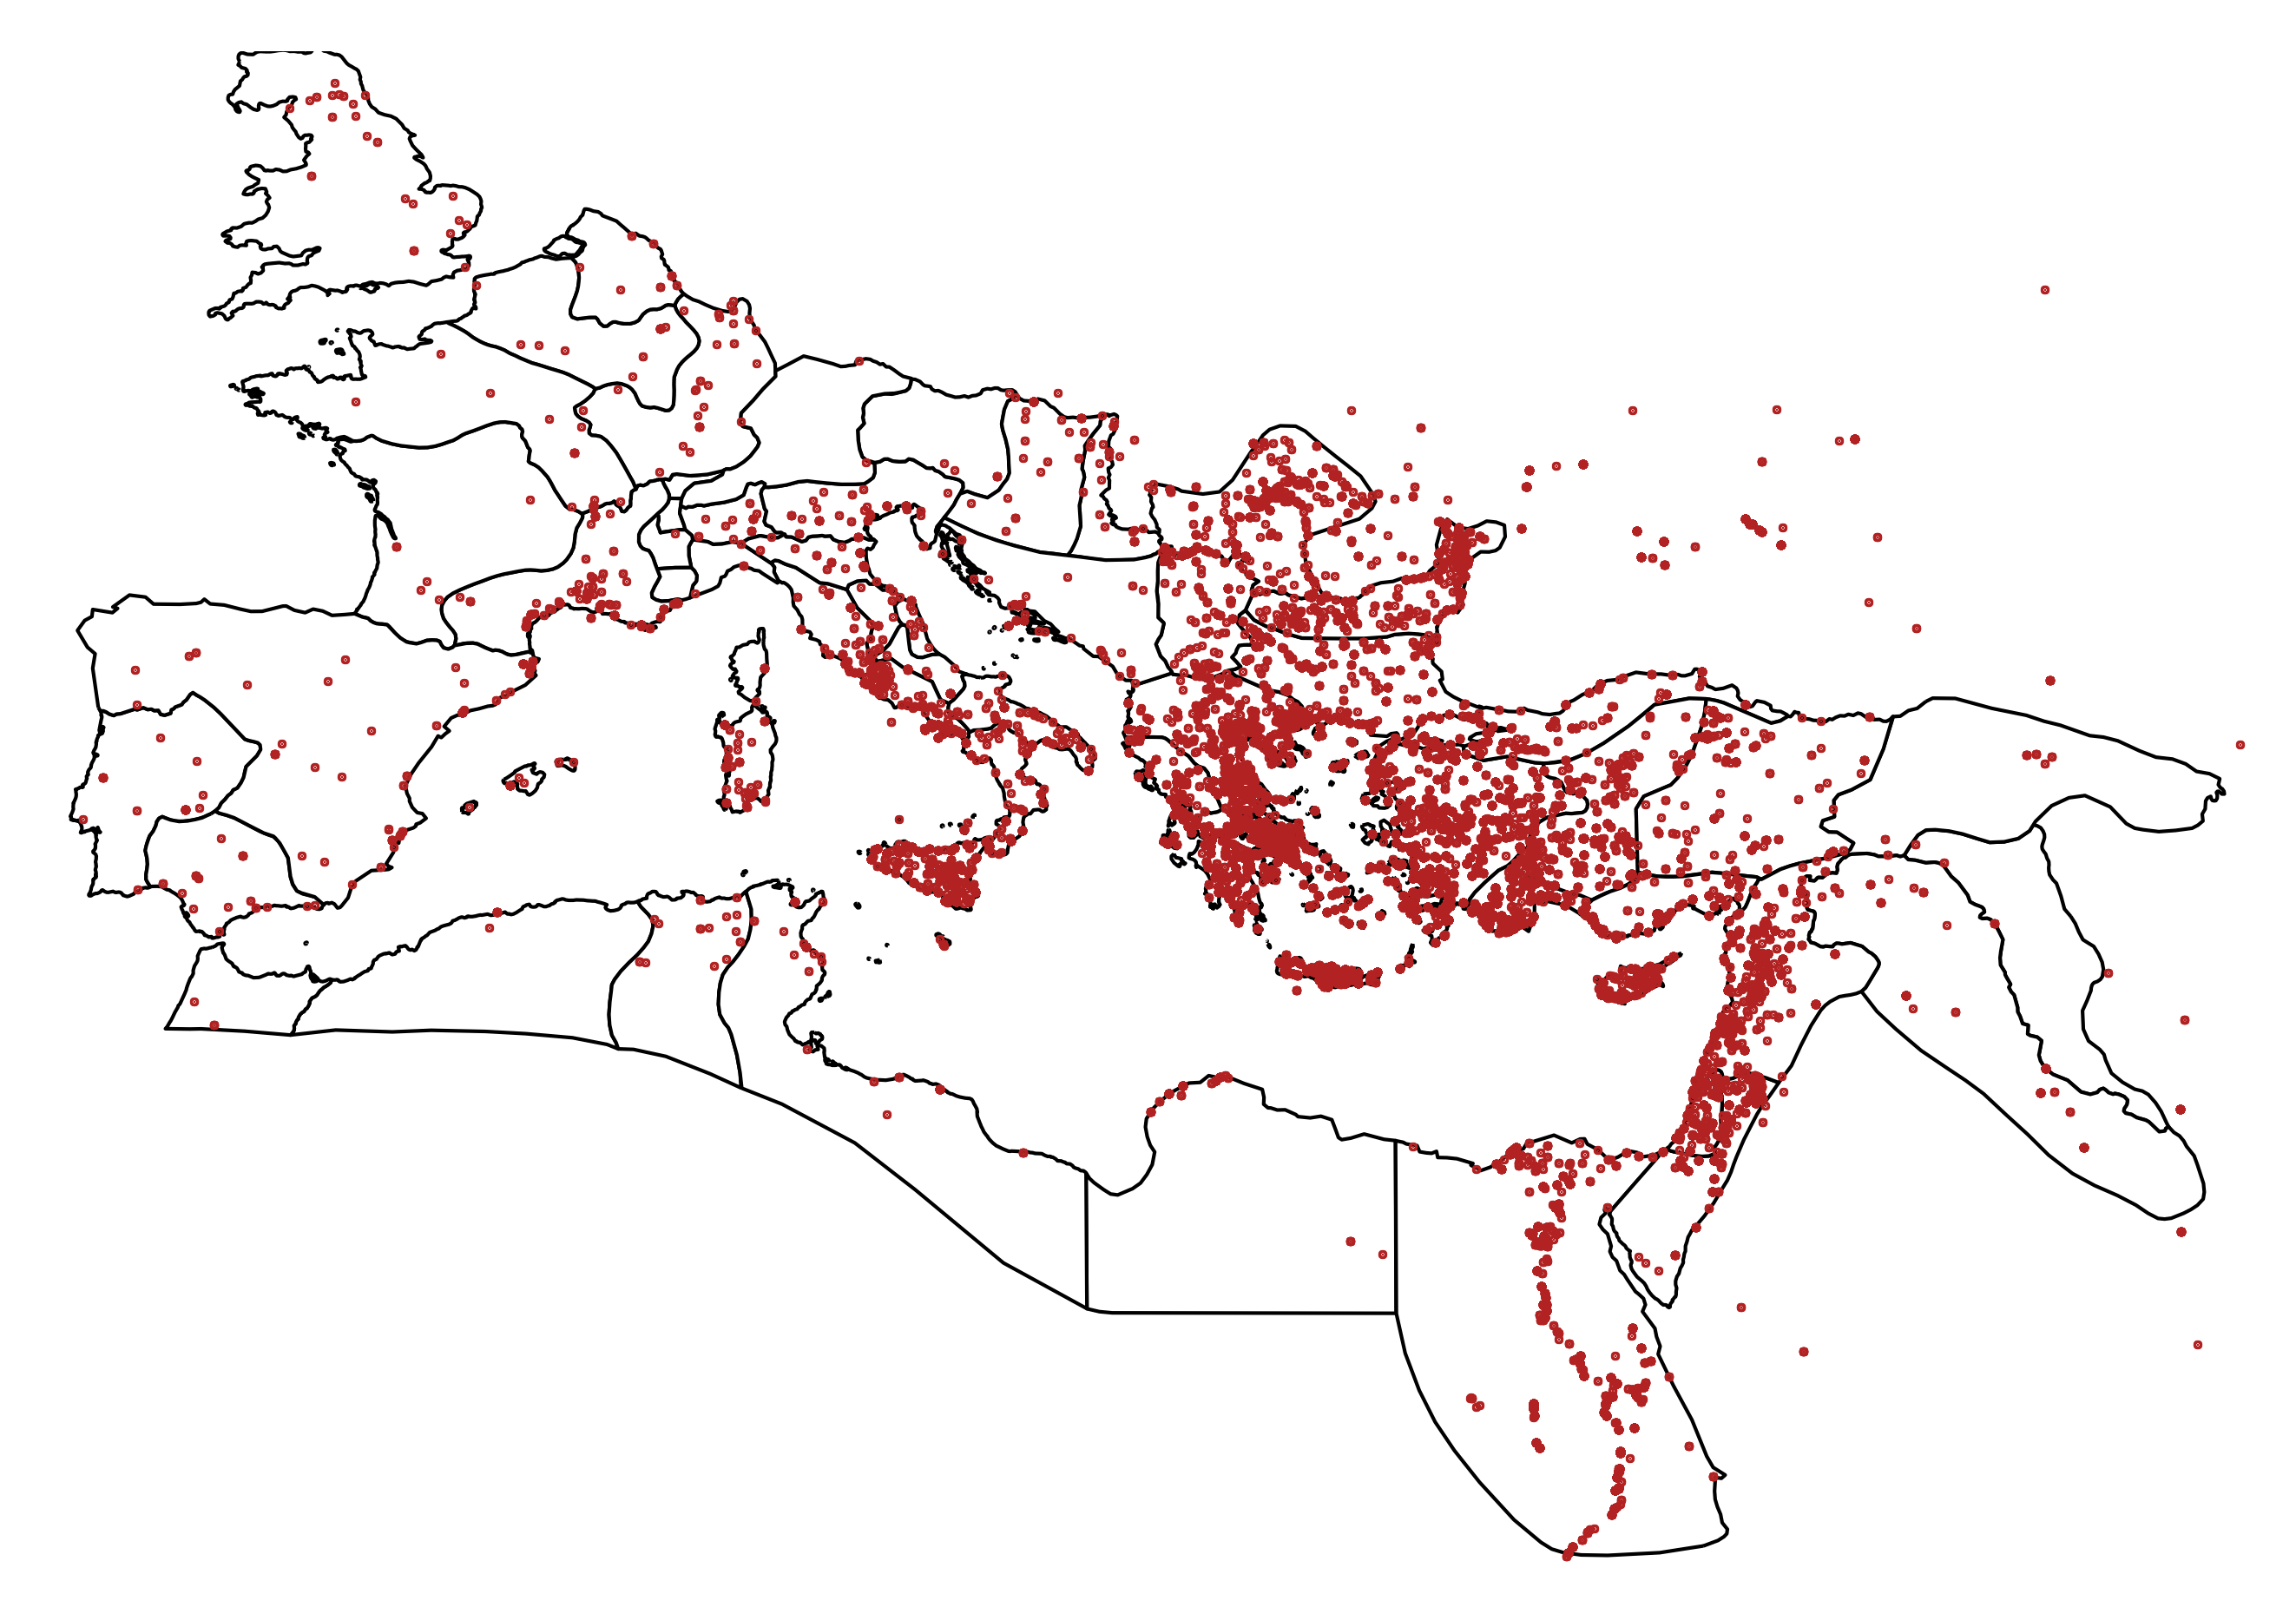

In [25]:
fig, ax = plt.subplots(figsize=(4.45, 3.5), tight_layout=True)
ax.axis("off")
#gplt.kdeplot(GIST[(~GIST["greece?"]) & (GIST["geometry"].notnull())], cmap='Greens', ax=ax, fill=True)
#gplt.kdeplot(GIST[GIST["greece?"]], cmap='Reds', ax=ax, fill=True)

#pleiades_regions_merged_buffer_gs.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
provinces.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)
GIST.plot(marker=",", markersize=0.02, ax=ax, color="firebrick")
# GIST[GIST["greece?"]].plot(marker=",", markersize=0.02, ax=ax, color="firebrick") #, alpha=0.7)
# GIST[~GIST["greece?"]].plot(marker=",", markersize=0.02, ax=ax, color="darkolivegreen") #, alpha=0.7)

ax.set_xlim(-10,50)
ax.set_ylim(22,56)

In [26]:
GIST.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"[ν, βοῦς, α, θύος, γνώστης, δὲ, ν, ἄτεχνος, μή...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786252],[],[],[],[],[],[IG I³ 2],[1707],[],[373],NaN,NaN,None,None
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"[Ἤρ, εἰσπλέω, Ἀθῆναι, τὶς, ἀθλοθέτης, τριάκοντ...",490-480 a.,-490.0,-480.0,[range],1701.0,1700.0,[786253],[],[],[],[],[],[IG I³ 3],[ii-1b],[],[373],NaN,NaN,None,None
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)


In [27]:
polis = polis[~polis["geometry"].is_empty]

In [28]:
polis.head(5)

,name,polis_id,xcoord,ycoord,edges,Polisity,Hellenicity,Fame,In_out,Size,Silver_1st,Bronze_1st,Grid,Colonies,Victors,Proxenoi,Walls,Delian_League,Koinon,Regime,Region_num,Region name,Source,Elevation_m,geometry
0,1-Alalie,1,9.511698,42.102432,none,1.0,1.0,1.12,1.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,Spain & France,HansonNielson,41.7,POINT (9.51170 42.10243)
1,10-Akrai,10,14.916667,37.083333,none,3.0,1.0,1.25,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,2.0,Sikelia,HansonNielson,604.0,POINT (14.91667 37.08333)
2,100-Kassopa,100,20.687268,39.140534,none,1.0,1.0,1.37,3.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,Epeiros,HansonNielson,452.4,POINT (20.68727 39.14053)
3,1000-Rhodos,1000,28.227611,36.443113,none,1.0,1.0,7.00,2.0,5.0,5.0,4.0,5.0,3.0,1.0,1.0,1.0,0.0,NaN,2.0,42.0,Rhodos,HansonNielson,13.6,POINT (28.22761 36.44311)
4,1001-Aspendos,1001,31.170175,36.939091,none,1.0,2.0,2.25,2.0,4.0,5.0,4.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,0.0,43.0,Pamphylia & Kilikia,HansonNielson,44.2,POINT (31.17017 36.93909)


# Map inscriptions on POLIS dataset

In [30]:
# Size attribute: (1-5 ranking, 5 is largest, based on HN estimates. Range 0-5. 1= 0-25 km sq.; 2 = 25-100 km sq, 3 = 100-200 km sq; 4 = 200-500 km sq; 5 = 500 km sq or more. 0 = no evidence for size. HN Appendix 9, with additions from Hansen 2008 and from Emily Mackil (per litt). - see https://polis.stanford.edu
polis.groupby("Size").size()

Size
0.0    242
1.0    201
2.0    220
3.0     81
4.0    104
5.0     63
dtype: int64

array([[<Axes: title={'center': 'Size'}>]], dtype=object)

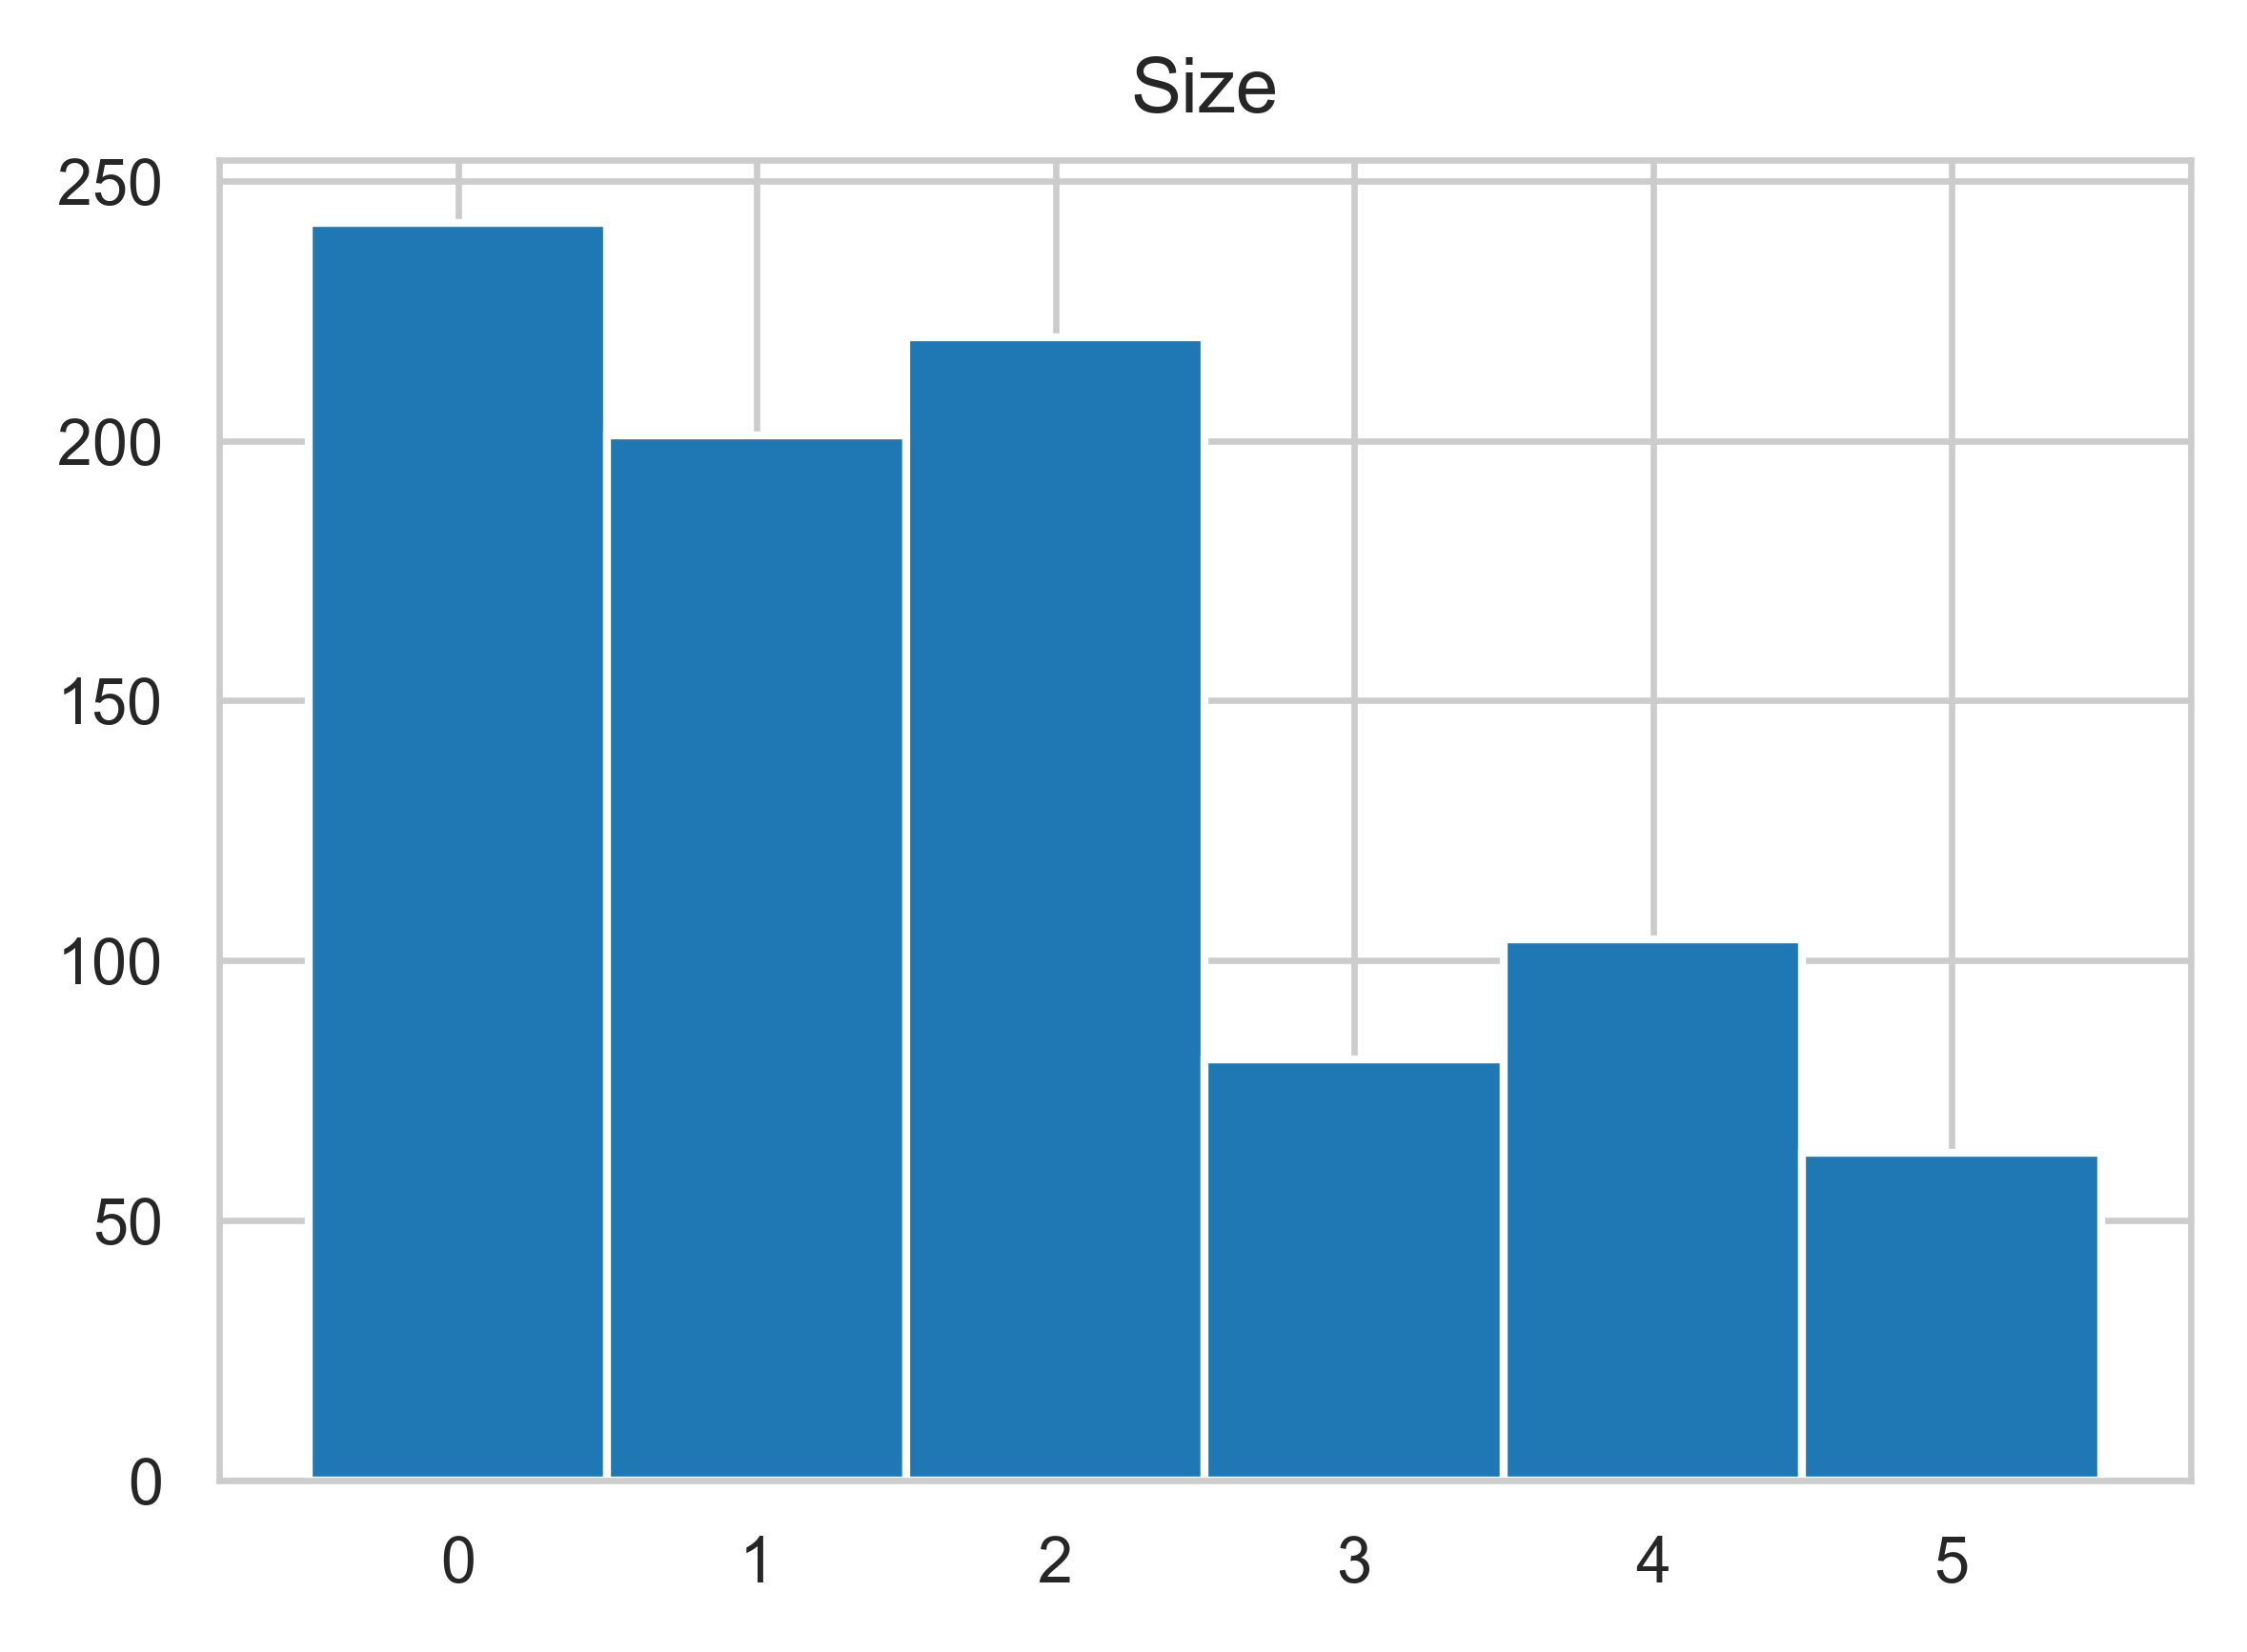

In [31]:
polis.hist("Size", bins=[n/10 for n in range(-5,65,10)])

In [32]:
geod = Geod(ellps="WGS84")
def get_dist_m(inscr_geo, city_geo):
    line_string = LineString([inscr_geo, city_geo])
    return np.round(geod.geometry_length(line_string), 2)

def ckdnearest(inscriptions, polis):

    polis = polis[['name', 'Size', 'Fame', 'geometry']]
    insr_geometries = np.array(list(inscriptions.geometry.apply(lambda x: (x.x, x.y))))
    polis_geometries = np.array(list(polis.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(polis_geometries)
    dist, idx = btree.query(insr_geometries, k=1)
    nearest_polis_df = polis.iloc[idx].rename(columns={"geometry": "polis_geo"}).reset_index(drop=True)
    nearest_polis_df["polis_geo"] = [[geom.x, geom.y] for geom in nearest_polis_df["polis_geo"]]

    merge_gdf = pd.concat(
        [
            inscriptions.reset_index(drop=True),
            nearest_polis_df,
            pd.Series(dist, name="polis_dist")
        ],
        axis=1)
    merge_gdf["polis_dist"] = merge_gdf.apply(lambda row: get_dist_m(row.geometry, row["polis_geo"]), axis=1)
    return merge_gdf

In [33]:
GISTgeo = GIST[GIST.geometry.notnull()]

In [34]:
len(GISTgeo)

180061

In [35]:
GISTnogeo = GIST[GIST.geometry.isnull()]

In [36]:
%%time
GISTgeo = ckdnearest(GISTgeo, polis)

CPU times: user 6.83 s, sys: 121 ms, total: 6.96 s
Wall time: 7.25 s


In [37]:
GISTgeo.head(10)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,name,Size,Fame,polis_geo,polis_dist
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,5.0,20.87,"[23.7278, 37.9778]",653.43
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,5.0,20.87,"[23.7278, 37.9778]",653.43
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),362-Eleusis,1.0,1.37,"[23.5423, 38.0394]",530.31
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"[δραχμός, τε, τὶς, μόνος, δῆμος, ὁ, παλέω, δοκ...",ante 460 a.,NaN,-461.0,[ante],1701.0,1700.0,[786256],[],[],[],[],[],[IG I³ 6],[6],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),362-Eleusis,1.0,1.37,"[23.5423, 38.0394]",530.31
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"[συμμαχία, καὶ, ὅρκος, φθινάς, καὶ, Ἐγεσταῖος,...",ante med. s. V a.,NaN,-456.0,"[range, cent, phase, middle, ante]",1701.0,1700.0,[786261],[],[],[],[],[],[IG I³ 11],[5770],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,5.0,20.87,"[23.7278, 37.9778]",653.43
5,14,IG I³\n14,Att. — stoich. 23 — 453/2?,46.0,[ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι· — — — ἐπρ...,[εδοχσεν τει βολει και τοι δεμοι --- επρυτανευ...,ἐπεστάτε ΛΙος ἀπάγεν στο Παναθέναια τὰ μεγάχσν...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ἐπρυτάνευε ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, πρυτανεία, ἐφίστ...",453/2?,-453.0,-452.0,[range],1701.0,1700.0,[786264],[],[],[],[],[],[IG I³ 14],[296],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,5.0,20.87,"[23.7278, 37.9778]",653.43
6,15,IG I³\n15,Att. — stoich. 47 — c. 450 a.,48.0,— — ΧΙ — —\n— — ΔΙ — —\n— — ΟΛ — —\n— — ΟΝ̣ — ...,0 ---- ολ ---- ον -- [-- ------]ανε ----- [-- ...,ΧΙ ΔΙ ΟΛ ΟΝ ανε ι ἐπι δραχμὰς παρει τα ι Ἀθενα...,ΧΙ ΔΙ ΟΛ ΟΝ ανε ι ἐπι δραχμὰς παρει τα ι Ἀθενα...,"[Ζεύς, οὐ, ὁ, ἐπί, δραχμή, παρίημι, τε, ὁ, Ἀθή...",c. 450 a.,-455.0,-445.0,"[exact, phase, ca]",1701.0,1700.0,[786265],[],[],[],[],[],"[IG I³ 15, IG I³ 15, IG I³ 15]","[15b-and-c, 6430b, 2]",[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,5.0,20.87,"[23.7278, 37.9778]",653.43
7,16,IG 

In [38]:
GISTgeo.columns

Index(['PHI_ID', 'reference', 'metadata', 'lines', 'text_raw', 'text_iphi',
       'clean_text_conservative', 'clean_text_interpretive_word', 'lemmata',
       'raw_date', 'not_before', 'not_after', 'date_type', 'region_main_id',
       'region_sub_id', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID',
       'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID',
       'x_long', 'y_lat', 'TMgeo_name', 'geometry', 'name', 'Size', 'Fame',
       'polis_geo', 'polis_dist'],
      dtype='object')

In [39]:
GISTgeo.rename(columns={"name": "polis_context_name"}, inplace=True)
GISTgeo.rename(columns={"Size": "polis_context_size"}, inplace=True)
GISTgeo.rename(columns={"Fame": "polis_context_fame"}, inplace=True)

In [40]:
GISTgeo["polis_context_name"] = GISTgeo["polis_context_name"].apply(lambda x: x.partition("-")[2])

In [41]:
GISTgeo.sample(10, random_state=0)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,polis_geo,polis_dist
97805,252494,Miletos\n405,"Milet I 7, 250",5.0,[vacat Μένιππος Τ]α̣υρίσκου\n[τὴν γυναῖκα κ]αὶ...,[ [την γυναικα κ]αι ταυρισκος [ [ [.,αυρίσκου αὶ Ταυρίσκος ὴν μητέρα ἰσχρίωνος σασαν,Μένιππος Ταυρίσκου τὴν γυναῖκα καὶ Ταυρίσκος Μ...,"[ἄνιππος, Τύραννος, τίν, γυνή, καὶ, σατυρίσκος...","Milet I 7, 250",NaN,NaN,[unknown],1702.0,1688.0,[862266],[],[],[],[],[],[],[],[],[1375],27.277706,37.521576,Miletos,POINT (27.27771 37.52158),Miletos,5.0,12.25,"[27.278369, 37.530233]",962.62
5762,31844,"IG V,1\n1406",Messenia — Asine — 301 AD,27.0,"{²cap. 7,30-48}²\n[τ]ο̣ῖς λ[οιποῖς πλάσταις γυ...",[τ]οις λ[οιποις πλασταις γυψαριοις] τρεφομε[νο...,οῖς λ τρεφομέ ὑδραγωγῷ δι’ ὅλ τῷ ἐργαζομένῳ ἰς...,τοῖς λοιποῖς πλάσταις γυψαρίοις τρεφομένοις ἡμ...,"[τοῖρ, λοιπός, πλάστις, γυιαρκής, τρέφω, ἡμέρω...",301 AD,301.0,301.0,[exact],1690.0,1658.0,[804523],[],[],[],[],[],[],[],[],[1364],21.932341,37.069455,Messenia,POINT (21.93234 37.06946),Messene/Ithome,4.0,5.25,"[21.9204389, 37.175501]",11816.38
25883,145630,IG VII\n2140,Boiotia — Thespiai — Rom. Imp. period,1.0,ἐπὶ Θεογίτου ἥρ{ε}ωϊ {²⁶ἥρωϊ}²⁶.,επι θεογιτου ηρωι.,ἐπὶ Θεογίτου ἥρεωϊ,ἐπὶ Θεογίτου ἥρωϊ,"[ἐπί, νεόγαμος, ἥρως]",Rom. Imp. period,-31.0,410.0,"[range, period]",1698.0,1691.0,[811648],[],[],[],[],[],[],[],[],[2746],23.152862,38.295831,Thespiai,POINT (23.15286 38.29583),Thespiai,4.0,3.00,"[23.1528615, 38.295831]",0.00
9151,63458,"IG XI,4\n975",Delos — shortly after ca. 250 BC,11.0,[— — — καὶ ἐκγόν]ους̣· [ὑπάρ]-\n[χειν δὲ αὐτοῖ...,[--- και εκγον]ους [υπαρχειν δε αυτοι]ς εν δηλ...,ους ς ἐν Δήλ γκτησιν καὶ προεαν ἐν τοῖς ἀγῶσιν...,καὶ ἐκγόνους ὑπάρχειν δὲ αὐτοῖς ἐν Δήλωι γῆς κ...,"[καὶ, ἔκγονος, ὑπάρχω, δὲ, αὐτός, ἐν, μέλει, γ...",shortly after ca. 250 BC,NaN,NaN,"[unknown, shortly, phase, ca]",1699.0,1672.0,[770830],[],[],[],[],[],[],[],[],[542],25.271111,37.393333,Delos,POINT (25.27111 37.39333),Delos,1.0,3.50,"[25.268131, 37.3955735]",362.58
74712,226996,Akoris\n83,Eg. — Akoris (Tehna) — Rom. Imp. period — SB 1.65,4.0,"Κολλαῦ-\nτις Με-\nσοήρι-\nος, (ἐτῶν) κβʹ.",κολλαυτις μεσοηριος ετων.,Κολλαῦτις Μεσοήριος κβʹ,Κολλαῦτις Μεσοήριος ἐτῶν κβʹ,"[Μεσσήνιος, ἔτος, καί]",Rom. Imp. period,-31.0,410.0,"[range, period]",1695.0,1694.0,[103072],[],[],[],[],[],[],[],[],[2309],30.771322,28.189047,Tenis - Hakoris,POINT (30.77132 28.18905),Phrygia,NaN,NaN,"[31.25, 27.75]",67715.42
88543,241907,SGDI II\n2991,Phokis — Delphi,1.0,[Ἀ]πόλλωνι.,[α]πολλωνι.,πόλλωνι,Ἀπόλλωνι,[Ἀπόλλων],Delphi,NaN,NaN,[unknown],1698.0,1272.0,[916565],[],[],[],[],[],[],[],[],[543],22.501406,38.481955,Delphoi,POINT (22.50141 38.48195),Delphoi,2.0,8.00,"[22.4958, 38.4792]",576.82
148142,315837,"Histria VIII,1\n241",Scythia Minor [Thasos] — Istros-Histria — ca. ...,2.0,\nΟ.,None,Ο,Ο,[ὁ],ca. 325-317 BC,-325.0,-317.0,"[range, phase, ca]",NaN,NaN,[923781],[],[],[],[],[],[],[],[],[1068],28.774800,44.547600,Istros,POINT (28.77480 44.54760),Istros,5.0,2.00,"[28.769256, 44.6445585]",10783.39
163836,333712,"SEG\n30:1222,A2",Italia — Taras-Tarentum (Taranto) — 4th/3rd c....,1.0,ℎημιω(δέλιον).,ημιωδελιον.,ℎημιω,ℎημιωδέλιον,[ἡμιωβέλιον],4th/3rd c. BC,-400.0,-201.0,"[range, cent, morece]",1696.0,1689.0,[883676],[],[],[],[],[],[],[],[],[2267],17.228553,40.476034,Tarentum,POINT (17.22855 40.47603),Tarentum,NaN,NaN,"[17.234299, 40.4726315]",616.58
128987,293445,SEG\n32:187,Att. — Athens — ca. 150-160 AD,3.0,[ἀείσειτ]οι\n[Νούμμιο]ς Ἱεροφάντης Φ[αληρεύς]\...,[αεισειτ]οι [νουμμιο]ς ιεροφαντης φ[αληρευς] [...,οι ς Ἱεροφάντης Φ ροκῆρυξ Φ,ἀείσειτοι Νούμμιος Ἱεροφάντης Φαληρεύς Νούμμιο...,"[ἀείσιτος, πολέμιος, ἱεροφάντης, Φαληρεύς, πολ...",ca. 150-160 AD,149.0,161.0,"[range, phase, ca]",170

In [42]:
def context_by_dist(row, col):
    col_val = row[col]
    if row["polis_dist"] > 5000:
        col_val = None
    return col_val
GISTgeo["polis_context_name"] = GISTgeo.apply(lambda row: context_by_dist(row, "polis_context_name"), axis=1)
GISTgeo["polis_context_size"] = GISTgeo.apply(lambda row: context_by_dist(row, "polis_context_size"), axis=1)
GISTgeo["polis_context_fame"] = GISTgeo.apply(lambda row: context_by_dist(row, "polis_context_fame"), axis=1)

In [43]:
GISTgeo.sample(10, random_state=0)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,polis_geo,polis_dist
97805,252494,Miletos\n405,"Milet I 7, 250",5.0,[vacat Μένιππος Τ]α̣υρίσκου\n[τὴν γυναῖκα κ]αὶ...,[ [την γυναικα κ]αι ταυρισκος [ [ [.,αυρίσκου αὶ Ταυρίσκος ὴν μητέρα ἰσχρίωνος σασαν,Μένιππος Ταυρίσκου τὴν γυναῖκα καὶ Ταυρίσκος Μ...,"[ἄνιππος, Τύραννος, τίν, γυνή, καὶ, σατυρίσκος...","Milet I 7, 250",NaN,NaN,[unknown],1702.0,1688.0,[862266],[],[],[],[],[],[],[],[],[1375],27.277706,37.521576,Miletos,POINT (27.27771 37.52158),Miletos,5.0,12.25,"[27.278369, 37.530233]",962.62
5762,31844,"IG V,1\n1406",Messenia — Asine — 301 AD,27.0,"{²cap. 7,30-48}²\n[τ]ο̣ῖς λ[οιποῖς πλάσταις γυ...",[τ]οις λ[οιποις πλασταις γυψαριοις] τρεφομε[νο...,οῖς λ τρεφομέ ὑδραγωγῷ δι’ ὅλ τῷ ἐργαζομένῳ ἰς...,τοῖς λοιποῖς πλάσταις γυψαρίοις τρεφομένοις ἡμ...,"[τοῖρ, λοιπός, πλάστις, γυιαρκής, τρέφω, ἡμέρω...",301 AD,301.0,301.0,[exact],1690.0,1658.0,[804523],[],[],[],[],[],[],[],[],[1364],21.932341,37.069455,Messenia,POINT (21.93234 37.06946),None,NaN,NaN,"[21.9204389, 37.175501]",11816.38
25883,145630,IG VII\n2140,Boiotia — Thespiai — Rom. Imp. period,1.0,ἐπὶ Θεογίτου ἥρ{ε}ωϊ {²⁶ἥρωϊ}²⁶.,επι θεογιτου ηρωι.,ἐπὶ Θεογίτου ἥρεωϊ,ἐπὶ Θεογίτου ἥρωϊ,"[ἐπί, νεόγαμος, ἥρως]",Rom. Imp. period,-31.0,410.0,"[range, period]",1698.0,1691.0,[811648],[],[],[],[],[],[],[],[],[2746],23.152862,38.295831,Thespiai,POINT (23.15286 38.29583),Thespiai,4.0,3.00,"[23.1528615, 38.295831]",0.00
9151,63458,"IG XI,4\n975",Delos — shortly after ca. 250 BC,11.0,[— — — καὶ ἐκγόν]ους̣· [ὑπάρ]-\n[χειν δὲ αὐτοῖ...,[--- και εκγον]ους [υπαρχειν δε αυτοι]ς εν δηλ...,ους ς ἐν Δήλ γκτησιν καὶ προεαν ἐν τοῖς ἀγῶσιν...,καὶ ἐκγόνους ὑπάρχειν δὲ αὐτοῖς ἐν Δήλωι γῆς κ...,"[καὶ, ἔκγονος, ὑπάρχω, δὲ, αὐτός, ἐν, μέλει, γ...",shortly after ca. 250 BC,NaN,NaN,"[unknown, shortly, phase, ca]",1699.0,1672.0,[770830],[],[],[],[],[],[],[],[],[542],25.271111,37.393333,Delos,POINT (25.27111 37.39333),Delos,1.0,3.50,"[25.268131, 37.3955735]",362.58
74712,226996,Akoris\n83,Eg. — Akoris (Tehna) — Rom. Imp. period — SB 1.65,4.0,"Κολλαῦ-\nτις Με-\nσοήρι-\nος, (ἐτῶν) κβʹ.",κολλαυτις μεσοηριος ετων.,Κολλαῦτις Μεσοήριος κβʹ,Κολλαῦτις Μεσοήριος ἐτῶν κβʹ,"[Μεσσήνιος, ἔτος, καί]",Rom. Imp. period,-31.0,410.0,"[range, period]",1695.0,1694.0,[103072],[],[],[],[],[],[],[],[],[2309],30.771322,28.189047,Tenis - Hakoris,POINT (30.77132 28.18905),None,NaN,NaN,"[31.25, 27.75]",67715.42
88543,241907,SGDI II\n2991,Phokis — Delphi,1.0,[Ἀ]πόλλωνι.,[α]πολλωνι.,πόλλωνι,Ἀπόλλωνι,[Ἀπόλλων],Delphi,NaN,NaN,[unknown],1698.0,1272.0,[916565],[],[],[],[],[],[],[],[],[543],22.501406,38.481955,Delphoi,POINT (22.50141 38.48195),Delphoi,2.0,8.00,"[22.4958, 38.4792]",576.82
148142,315837,"Histria VIII,1\n241",Scythia Minor [Thasos] — Istros-Histria — ca. ...,2.0,\nΟ.,None,Ο,Ο,[ὁ],ca. 325-317 BC,-325.0,-317.0,"[range, phase, ca]",NaN,NaN,[923781],[],[],[],[],[],[],[],[],[1068],28.774800,44.547600,Istros,POINT (28.77480 44.54760),None,NaN,NaN,"[28.769256, 44.6445585]",10783.39
163836,333712,"SEG\n30:1222,A2",Italia — Taras-Tarentum (Taranto) — 4th/3rd c....,1.0,ℎημιω(δέλιον).,ημιωδελιον.,ℎημιω,ℎημιωδέλιον,[ἡμιωβέλιον],4th/3rd c. BC,-400.0,-201.0,"[range, cent, morece]",1696.0,1689.0,[883676],[],[],[],[],[],[],[],[],[2267],17.228553,40.476034,Tarentum,POINT (17.22855 40.47603),Tarentum,NaN,NaN,"[17.234299, 40.4726315]",616.58
128987,293445,SEG\n32:187,Att. — Athens — ca. 150-160 AD,3.0,[ἀείσειτ]οι\n[Νούμμιο]ς Ἱεροφάντης Φ[αληρεύς]\...,[αεισειτ]οι [νουμμιο]ς ιεροφαντης φ[αληρευς] [...,οι ς Ἱεροφάντης Φ ροκῆρυξ Φ,ἀείσειτοι Νούμμιος Ἱεροφάντης Φαληρεύς Νούμμιο...,"[ἀείσιτος, πολέμιος, ἱεροφάντης, Φαληρεύς, πολ...",ca. 150-160 AD,149.0,161.0,"[range, phase, ca]",1701.0,1700.0,[88466

In [44]:
GISTgeo.drop(["polis_geo", "polis_dist"], axis=1, inplace=True)

In [45]:
GISTgeo.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"[δραχμός, τε, τὶς, μόνος, δῆμος, ὁ, παλέω, δοκ...",ante 460 a.,NaN,-461.0,[ante],1701.0,1700.0,[786256],[],[],[],[],[],[IG I³ 6],[6],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"[συμμαχία, καὶ, ὅρκος, φθινάς, καὶ, Ἐγεσταῖος,...",ante med. s. V a.,NaN,-456.0,"[range, cent, phase, middle, ante]",1701.0,1700.0,[786261],[],[],[],[],[],[IG I³ 11],[5770],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87


# Map inscriptions on Hanson's cities and assign them urban context 

In [46]:
cities_id_name_dict = dict(zip(cities["ID"], cities["Ancient Toponym"]))
cities_id_pop_dict = dict(zip(cities["ID"], cities["pop_est"]))

In [47]:
masks_dict = {}
masks_dict["large"] = cities["pop_est"] >= 30000
masks_dict["medium"] = (cities["pop_est"] >= 5000) & (cities["pop_est"] < 30000)
masks_dict["small"] = cities["pop_est"] < 5000

In [48]:
geod = Geod(ellps="WGS84")
def get_dist_m(inscr_geo, city_geo):
    try:
        line_string = LineString([inscr_geo, city_geo])
        return np.round(geod.geometry_length(line_string), 2)
    except:
        return None

def ckdnearest(city_type):
    cities_subset = cities[masks_dict[city_type]]
    inscr_ids = GISTgeo["PHI_ID"] # GIST[(GIST.geometry.is_valid) & (~GIST.geometry.is_empty)]["GIST-ID"]
    inscr_geometries = np.array(list(GISTgeo.geometry.apply(lambda x: (x.x, x.y))))
    inscr_ids_missing = GISTnogeo["PHI_ID"]
    cities_geometries = np.array(list(cities_subset.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(cities_geometries)
    dist, idx = btree.query(inscr_geometries, k=1)
    inscr_cities_name_dict = dict(zip(inscr_ids, cities_subset.iloc[idx]["Ancient Toponym"]))
    inscr_cities_pop_dict = dict(zip(inscr_ids, cities_subset.iloc[idx]["pop_est"]))
    inscr_cities_geo_dict = dict(zip(inscr_ids, cities_subset.iloc[idx].geometry))
    for id in inscr_ids_missing:
        inscr_cities_name_dict[id] = None
        inscr_cities_pop_dict[id] = None
        inscr_cities_geo_dict[id] = None
    GISTgeo[city_type + "_city_name"] = GISTgeo["PHI_ID"].apply(lambda x: inscr_cities_name_dict[x])
    GISTgeo[city_type + "_city_geo"] = GISTgeo["PHI_ID"].apply(lambda x: inscr_cities_geo_dict[x])
    GISTgeo[city_type + "_city_pop"] = GISTgeo["PHI_ID"].apply(lambda x: inscr_cities_pop_dict[x])
    GISTgeo[city_type + "_city_dist"] = GISTgeo.apply(lambda row: get_dist_m(row.geometry, row[city_type + "_city_geo"]), axis=1)

In [49]:
%%time
ckdnearest("large")
ckdnearest("medium")
ckdnearest("small")

CPU times: user 19.2 s, sys: 157 ms, total: 19.3 s
Wall time: 19.5 s


In [50]:
GISTgeo.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,large_city_name,large_city_geo,large_city_pop,large_city_dist,medium_city_name,medium_city_geo,medium_city_pop,medium_city_dist,small_city_name,small_city_geo,small_city_pop,small_city_dist
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,Athenae,POINT (23.726559 37.971119),58112.0,289.45,Aegina,POINT (23.4285 37.750074),8209.0,35874.00,Euonymon,POINT (23.737382 37.916867),1000.0,6313.17
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,Athenae,POINT (23.726559 37.971119),58112.0,289.45,Aegina,POINT (23.4285 37.750074),8209.0,35874.00,Euonymon,POINT (23.737382 37.916867),1000.0,6313.17
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37,Piraeus,POINT (23.641103 37.950902),31124.0,13551.22,Tanagra,POINT (23.536834 38.32732),10384.0,31436.15,Eleusis,POINT (23.542112 38.04325),1000.0,112.09
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"[δραχμός, τε, τὶς, μόνος, δῆμος, ὁ, παλέω, δοκ...",ante 460 a.,NaN,-461.0,[ante],1701.0,1700.0,[786256],[],[],[],[],[],[IG I³ 6],[6],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37,Piraeus,POINT (23.641103 37.950902),31124.0,13551.22,Tanagra,POINT (23.536834 38.32732),10384.0,31436.15,Eleusis,POINT (23.542112 38.04325),1000.0,112.09
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"[συμμαχία, καὶ, ὅρκος, φθινάς, καὶ, Ἐγεσταῖος,...",ante med. s. V a.,NaN,-456.0,"[range, cent, phase, middle, ante]",1701.0,1700.0,[786261],[],[],[],[],[],[IG I³ 11],[5770],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,Athenae,POINT (23.726559 37.971119),58112.0,289.45,Aegina,POINT (23.4285 37.750074),8209.0,35874.00,Euonymon,POINT (23.737382 37.916867),1000.0,6313.17


In [51]:
def get_urban_context(row):
    urban_context_city = None
    urban_context_pop_est = None
    #if (row.geometry == None) | ~(row.geometry.is_valid) | (row.geometry.is_empty):
    if row.geometry.is_empty:
        urban_context = None
    else:
        urban_context = "rural"
        buffer = 5000
        for context in ["large", "medium", "small"]:
            if row[context + "_city_dist"] <= buffer:
                urban_context = context
                urban_context_city = row[context + "_city_name"]
                urban_context_pop_est = row[context + "_city_pop"]
                break
    return urban_context, urban_context_city, urban_context_pop_est

urban_contexts = GISTgeo.apply(lambda row: get_urban_context(row), axis=1)

GISTgeo["urban_context"] = [el[0] for el in urban_contexts]
GISTgeo["urban_context_city"] = [el[1] for el in urban_contexts]
GISTgeo["urban_context_pop_est"] = [el[2] for el in urban_contexts]

In [53]:
# perhaps thesecolumns could be useful for some analysis, but not now...
GISTgeo.drop(columns=['large_city_name', 'large_city_geo', 'large_city_dist', 'large_city_pop', 'medium_city_name', 'medium_city_geo', 'medium_city_pop', 'medium_city_dist', 'small_city_name', 'small_city_geo','small_city_dist', 'small_city_pop'], inplace=True)

In [54]:
GISTgeo.head(10)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,urban_context,urban_context_city,urban_context_pop_est
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, το͂ι, δέμοι, τὸς, ἐ, Σαλαμῖνι, κλερό...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],[],[],[],[],[],[IG I³ 1],[1672],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[ἐάν, τις, ἐν, ἒ, φρουρά, μή, πεντήκοντα, δραχ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],[],[],[],[],[],"[IG I³ 4(A), IG I³ 4(B)]",[1692],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, τε, παραβάτης, γ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],[],[],[],[],[],[IG I³ 5],[1284],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37,small,Eleusis,1000.0
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"[δραχμός, τε, τὶς, μόνος, δῆμος, ὁ, παλέω, δοκ...",ante 460 a.,NaN,-461.0,[ante],1701.0,1700.0,[786256],[],[],[],[],[],[IG I³ 6],[6],[],[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),Eleusis,1.0,1.37,small,Eleusis,1000.0
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"[συμμαχία, καὶ, ὅρκος, φθινάς, καὶ, Ἐγεσταῖος,...",ante med. s. V a.,NaN,-456.0,"[range, cent, phase, middle, ante]",1701.0,1700.0,[786261],[],[],[],[],[],[IG I³ 11],[5770],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0
5,14,IG I³\n14,Att. — stoich. 23 — 453/2?,46.0,[ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι· — — — ἐπρ...,[εδοχσεν τει βολει και τοι δεμοι --- επρυτανευ...,ἐπεστάτε ΛΙος ἀπάγεν στο Παναθέναια τὰ μεγάχσν...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ἐπρυτάνευε ...,"[δοκέω, βουλή, καὶ, ὁ, δῆμος, πρυτανεία, ἐφίστ...",453/2?,-453.0,-452.0,[range],1701.0,1700.0,[786264],[],[],[],[],[],[IG I³ 14],[296],[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0
6,15,IG I³\n15,Att. — stoich. 47 — c. 450 a.,48.0,— — ΧΙ — —\n— — ΔΙ — —\n— — ΟΛ — —\n— — ΟΝ̣ — ...,0 ---- ολ ---- ον -- [-- ------]ανε ----- [-- ...,ΧΙ ΔΙ ΟΛ ΟΝ ανε ι ἐπι δραχμὰς παρει τα ι Ἀθενα...,ΧΙ ΔΙ ΟΛ ΟΝ ανε ι ἐπι δραχμὰς παρει τα ι Ἀθενα...,"[Ζεύς, οὐ, ὁ, ἐπί, δραχμή, παρίημι, τε, ὁ, Ἀθή...",c. 450 a.,-455.0,-445.0,"[exact, phase, ca]",1701.0,1700.0,[786265],[],[],[],[],[],"[IG I³ 15, IG I³ 15, IG I³ 15]","[15b-and-c, 6430b, 2]",[],[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0
7,16

In [73]:
GIST = pd.concat([GISTgeo, GISTnogeo])

In [74]:
GIST.shape

(217863, 35)

In [75]:
GIST.tail(10)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,urban_context,urban_context_city,urban_context_pop_est
217764,353692,IK Strat. III\n1493,Caria — Stratonikeia — Börükçü — Roman period ...,9.0,ὁ δῆμος στεφανοῖ\nκαὶ θάπτι δημοσίᾳ Δράκον-\nτ...,ο δημος στεφανοι και θαπτι δημοσια δρακοντα δρ...,ὁ δῆμος στεφανοῖ καὶ θάπτι δημοσίᾳ Δράκοντα Δρ...,ὁ δῆμος στεφανοῖ καὶ θάπτι δημοσίᾳ Δράκοντα Δρ...,"[ὁ, δῆμος, στεφανόω, καὶ, θαῦμα, δημοσίᾳ, ἑξήκ...",Roman period,-146.0,324.0,"[range, period]",1702.0,1682.0,[950407],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217765,353693,IK Strat. III\n1494,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,7.0,Δρόσερος\nπά(λου) γ\n\nἔκτανέ με Δρόσερον καιν...,δροσερος παλου γ εκτανε με δροσερον καινοις ορ...,Δρόσερος πά γ ἔκτανέ με Δρόσερον καινοῖς ὀρχήμ...,Δρόσερος πάλου γ ἔκτανέ με Δρόσερον καινοῖς ὀρ...,"[πρότερος, πῶλος, γ, κράνον, μή, Δύσωρον, καιν...",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950408],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217766,353694,IK Strat. III\n1495,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,3.0,Χρῦσος\nπά(λου) η.\n,χρυσος παλου η.,Χρῦσος πά η,Χρῦσος πάλου η,"[νοῦσος, πῶλος, ὁ]",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950409],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217767,353695,IK Strat. III\n1496,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,3.0,Χρυσόπτερος\nπά(λου) ε.\n,χρυσοπτερος παλου ε.,Χρυσόπτερος πά ε,Χρυσόπτερος πάλου ε,"[χρυσοπτερος, πῶλος, ε]",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950410],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217768,353696,IK Strat. III\n1497,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,8.0,Βιτᾶλις\nπά(λου) α\n\n[ὁ θ]ρ̣ασὺς ἐν πυγμαῖς Β...,βιταλις παλου α [ο θ]ρασυς εν πυγμαις βιταλιος...,Βιτᾶλις πά α ρασὺς ἐν πυγμαῖς Βιτάλιος ἐνθάδε ...,Βιτᾶλις πάλου α ὁ θρασὺς ἐν πυγμαῖς Βιτάλιος ἐ...,"[τᾶλις, πῶλος, α, ὁ, θρασύς, ἐν, πυγμή, διάλιο...",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950411],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217769,353697,IK Strat. III\n1498,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,3.0,Ἀμαραῖος\nπά(λου) γ {²ϛ ph.}².\n,αμαραιος παλου γ.,Ἀμαραῖος πά γ,Ἀμαραῖος πάλου ϛ ph,"[ἡμεραῖος, πῶλος, ὁ, ὁ]",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950412],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217770,353698,IK Strat. III\n1499,Caria — Stratonikeia — Börükçü — 3rd c. AD? — ...,4.0,"Εὐμήλου τόδε σῆμα κραταιοῦ μουνομάχοιο,\nὃν πο...",ευμηλου τοδε σημα κραταιου μουνομαχοιο ον πολλ...,Εὐμήλου τόδε σῆμα κραταιοῦ μουνομάχοιο ὃν πολο...,Εὐμήλου τόδε σῆμα κραταιοῦ μουνομάχοιο ὃν πολλ...,"[ὅδε, σῆμα, κραταιός, μονόμαχος, ὅς, πολύς, πρ...",3rd c. AD?,201.0,300.0,"[range, cent]",1702.0,1682.0,[950413],[],[],[],[],[],[],[],[],[60372],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217771,353699,IK Strat. III\n1500,Caria — Stratonikeia — Yeniköy: Hankuyu Mevkii...,9.0,ἐνθάδε κεῖ-\nται ἱερεὺς\nΔήμητρος·\nὃ̣ς ἂν ἀδι...,ενθαδε κειται ιερευς δημητρος ος αν αδικησει ε...,ἐνθάδε κεῖται ἱερεὺς Δήμητρος ὃς ἂν ἀδικήσει ἐ...,ἐνθάδε κεῖται ἱερεὺς Δήμητρος ὃς ἂν ἀδικήσει ἐ...,"[ἐνθάδε, κεῖμαι, ἱερεύς, ὅς, ἄν, ἀδικέω, ἐπικα...",ca. 425-400 BC,-427.0,-398.0,"[range, phase, ca]",1702.0,1682.0,[950414],[],[],[],[],[],[],[],[],[34239],NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
217772,353700,IK Strat. III\n1501,Caria — Stratonikeia — Çatlı — ca. 50-25 BC — ...,19.0,ἐπὶ στ̣εφ̣ανηφόρου Φανίου το̣ῦ\nἈρτεμιδώ̣ρου τ...,επι στεφανηφορου φανιου του αρτεμιδωρου του με...,ἐπὶ στεφανηφόρου 

# Save for publication

In [76]:
isinstance(GIST["IG_ID"].tolist()[0], np.ndarray)

True

In [77]:
for col in GIST.columns:    
    types = list(set([type(el) for el in GIST[col]]))
    if len(types) == 1:
        if isinstance(GIST[col].tolist()[0], np.ndarray):
            GIST[col] = [str(list(el)) for el in GIST[col]]

In [78]:
for col in GIST.columns:
    types = list(set([type(el) for el in GIST[col]]))
    print(col, types)

PHI_ID [<class 'int'>]
reference [<class 'str'>]
metadata [<class 'str'>]
lines [<class 'float'>]
text_raw [<class 'str'>]
text_iphi [<class 'NoneType'>, <class 'str'>]
clean_text_conservative [<class 'str'>]
clean_text_interpretive_word [<class 'str'>]
lemmata [<class 'str'>]
raw_date [<class 'str'>]
not_before [<class 'float'>]
not_after [<class 'float'>]
date_type [<class 'str'>]
region_main_id [<class 'float'>]
region_sub_id [<class 'float'>]
TM_ID [<class 'str'>]
EDH_ID [<class 'str'>]
EDCS_ID [<class 'str'>]
EDR_ID [<class 'str'>]
LUPA_ID [<class 'str'>]
ISic_ID [<class 'str'>]
IG_ID [<class 'str'>]
atticinscriptions_ID [<class 'str'>]
Attalus_ID [<class 'str'>]
TMgeo_ID [<class 'str'>]
x_long [<class 'float'>]
y_lat [<class 'float'>]
TMgeo_name [<class 'NoneType'>, <class 'str'>]
geometry [<class 'NoneType'>, <class 'shapely.geometry.point.Point'>]
polis_context_name [<class 'float'>, <class 'NoneType'>, <class 'str'>]
polis_context_size [<class 'float'>]
polis_context_fame [<cl

In [80]:
GIST.to_parquet("../data/large_data/GIST_v1-0.parquet")

In [79]:
GIST.to_file("../data/large_data/GIST_v1-0.geojson", driver="GeoJSON")